In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from numpy.linalg import matrix_rank

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.linalg import matrix_rank

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import math

import matplotlib.pyplot as plt
import seaborn as sns

"""
! pip list
"""

'\n! pip list\n'

In [2]:
df = pd.read_csv('./../datasets/Data D4H19 - AHT Sept 2018.csv', low_memory=False)

In [5]:
df = df[df['CountryOfExploitation']=='US']

In [6]:
df.shape

(16956, 62)

In [7]:
df.head(15)

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
20889,2015,Hotline,Female,18--20,Adult,Adult,Unknown,US,-99,-99,...,0,Prostitution,0,Intimate Partner,US,1,0,0,0,0
20890,2015,Hotline,Female,18--20,Adult,Adult,Unknown,US,1,-99,...,0,Prostitution,0,Other,US,0,0,0,1,0
20891,2015,Hotline,Female,18--20,Adult,Adult,Adult,US,-99,-99,...,0,Prostitution,0,Intimate Partner,US,1,0,0,0,0
20892,2015,Hotline,Female,18--20,Adult,Adult,Unknown,US,-99,-99,...,0,Prostitution,0,Friend,US,0,1,0,0,0
20893,2015,Hotline,Female,18--20,Adult,Minor,Unknown,US,-99,1,...,0,Prostitution,0,Family/Relative,US,0,0,1,0,0
20894,2015,Hotline,Female,18--20,Adult,Minor,Minor,US,-99,-99,...,0,Prostitution,0,Friend,US,0,1,0,0,0
20895,2015,Hotline,Female,18--20,Adult,Minor,Unknown,US,-99,1,...,0,Prostitution,0,Unknown,US,-99,-99,-99,-99,1
20896,2015,Hotline,Female,18--20,Adult,Adult,Unknown,US,-99,-99,...,0,Prostitution,0,Intimate Partner,US,1,0,0,0,0
20897,2015,Hotline,Female,18--20,Adult,Adult,Adult,US,-99,-99,...,0,Prostitution,0,Intimate Partner,US,1,0,0,0,0
20898,2015,Hotline,Female,18--20,Adult,Adult,Unknown,US,-99,-99,...,0,Prostitution,0,Unknown,US,-99,-99,-99,-99,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16956 entries, 20889 to 54163
Data columns (total 62 columns):
yearOfRegistration                        16956 non-null int64
Datasource                                16956 non-null object
gender                                    16956 non-null object
ageBroad                                  16956 non-null object
majorityStatus                            16956 non-null object
majorityStatusAtExploit                   16956 non-null object
majorityEntry                             16956 non-null object
citizenship                               16956 non-null object
meansOfControlDebtBondage                 16956 non-null int64
meansOfControlTakesEarnings               16956 non-null int64
meansOfControlRestrictsFinancialAccess    16956 non-null int64
meansOfControlThreats                     16956 non-null int64
meansOfControlPsychologicalAbuse          16956 non-null int64
meansOfControlPhysicalAbuse               16956 non-null int6

In [9]:
df['yearOfRegistration'].value_counts(dropna=False)

2017    7510
2016    5494
2015    3952
Name: yearOfRegistration, dtype: int64

In [10]:
df['yearOfRegistration'].value_counts(dropna=False).sort_index()

2015    3952
2016    5494
2017    7510
Name: yearOfRegistration, dtype: int64

In [11]:
df['ageBroad'].value_counts(dropna=False).sort_index()

0--8         50
18--20     1526
21--23     1045
24--26      737
27--29      444
30--38      883
39--47      214
48+          82
9--17      3430
Unknown    8545
Name: ageBroad, dtype: int64

In [12]:
for c in df.columns:
    print("\n------------ %s:-------------" % c)
    print(df[c].value_counts().sort_index())


------------ yearOfRegistration:-------------
2015    3952
2016    5494
2017    7510
Name: yearOfRegistration, dtype: int64

------------ Datasource:-------------
Hotline    16956
Name: Datasource, dtype: int64

------------ gender:-------------
Female     15412
Male        1098
Unknown      446
Name: gender, dtype: int64

------------ ageBroad:-------------
0--8         50
18--20     1526
21--23     1045
24--26      737
27--29      444
30--38      883
39--47      214
48+          82
9--17      3430
Unknown    8545
Name: ageBroad, dtype: int64

------------ majorityStatus:-------------
Adult      9602
Minor      4607
Unknown    2747
Name: majorityStatus, dtype: int64

------------ majorityStatusAtExploit:-------------
Adult       2224
Minor       4656
Unknown    10076
Name: majorityStatusAtExploit, dtype: int64

------------ majorityEntry:-------------
Adult        285
Minor        279
Unknown    16392
Name: majorityEntry, dtype: int64

------------ citizenship:-------------
CN      1

In [13]:
df['citizenship'].value_counts(dropna=False).head(10)

ZZ    12141
US     4159
MX      444
CN      115
PH       46
IN       15
HT       13
KR       12
SV       11
Name: citizenship, dtype: int64

In [14]:
df['CountryOfExploitation'].value_counts(dropna=False).head(10)

US    16956
Name: CountryOfExploitation, dtype: int64

## Check for Multicollinearity (via Variance Inflation Factor - VIF)

In [16]:
X = df.drop(df.select_dtypes(['object']), axis=1)

In [17]:
X.head()

,yearOfRegistration,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,...,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
20889,2015,-99,-99,-99,-99,1,-99,1,-99,1,...,1,0,0,0,0,1,0,0,0,0
20890,2015,1,-99,-99,-99,-99,1,-99,-99,-99,...,1,0,0,0,0,0,0,0,1,0
20891,2015,-99,-99,-99,-99,1,-99,-99,-99,-99,...,1,0,0,0,0,1,0,0,0,0
20892,2015,-99,-99,-99,-99,-99,-99,-99,1,-99,...,1,0,0,0,0,0,1,0,0,0
20893,2015,-99,1,-99,-99,1,1,-99,-99,-99,...,1,0,0,0,0,0,0,1,0,0


In [18]:
X.shape

(16956, 49)

In [15]:
for i, col in enumerate(X.columns):
    print('VIF {}: {}'.format(col,variance_inflation_factor(X.values,i)))
    
## High VIF (5-10 or higher) indicates high correlation between column and one or more column(s)

VIF yearOfRegistration: 782.6320287712185
VIF meansOfControlDebtBondage: 47.333553237843454
VIF meansOfControlTakesEarnings: 35.82503097367307
VIF meansOfControlRestrictsFinancialAccess: 319.13802092416984
VIF meansOfControlThreats: 21.040990956211896
VIF meansOfControlPsychologicalAbuse: 26.858690254808625
VIF meansOfControlPhysicalAbuse: 21.08395690854809
VIF meansOfControlSexualAbuse: 41.070053717918235
VIF meansOfControlFalsePromises: 45.01360357402888
VIF meansOfControlPsychoactiveSubstances: 28.108011451068684
VIF meansOfControlRestrictsMovement: 19.367587579271877
VIF meansOfControlRestrictsMedicalCare: 79.75818318018365
VIF meansOfControlExcessiveWorkingHours: 75.57253887602764
VIF meansOfControlUsesChildren: 337.60152096864863
VIF meansOfControlThreatOfLawEnforcement: 67.27183208592834
VIF meansOfControlWithholdsNecessities: 45.03525286314747
VIF meansOfControlWithholdsDocuments: 56.1345913730158
VIF meansOfControlOther: 28.207065689771856
VIF meansOfControlNotSpecified: 5.200

C:\Users\ekvtjdx\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF isForcedMilitary: inf
VIF isOrganRemoval: inf
VIF typeOfLabourAgriculture: 821.0549500208618
VIF typeOfLabourAquafarming: 2332.073572875961
VIF typeOfLabourBegging: 1778875.5359310552
VIF typeOfLabourConstruction: 172.14432191637633
VIF typeOfLabourDomesticWork: 27.762974192367054
VIF typeOfLabourHospitality: 351.26799065684287
VIF typeOfLabourIllicitActivities: 5044309.221434503
VIF typeOfLabourManufacturing: 293.76995764679896
VIF typeOfLabourMiningOrDrilling: inf
VIF typeOfLabourPeddling: 5043423.190077324
VIF typeOfLabourTransportation: inf
VIF typeOfLabourOther: 371.5350341423633
VIF typeOfLabourNotSpecified: 75.87267147579524
VIF typeOfSexProstitution: 35.67969425909864
VIF typeOfSexPornography: 2575778.3260158524
VIF typeOfSexRemoteInteractiveServices: 2575905.9285451598
VIF typeOfSexPrivateSexualServices: 199.99344915582583
VIF isAbduction: 26.48792475234421
VIF recruiterRelationIntimatePartner: 86032.9730538612
VIF recruiterRelationFriend: 67703.80939813177
VIF recruiterRe

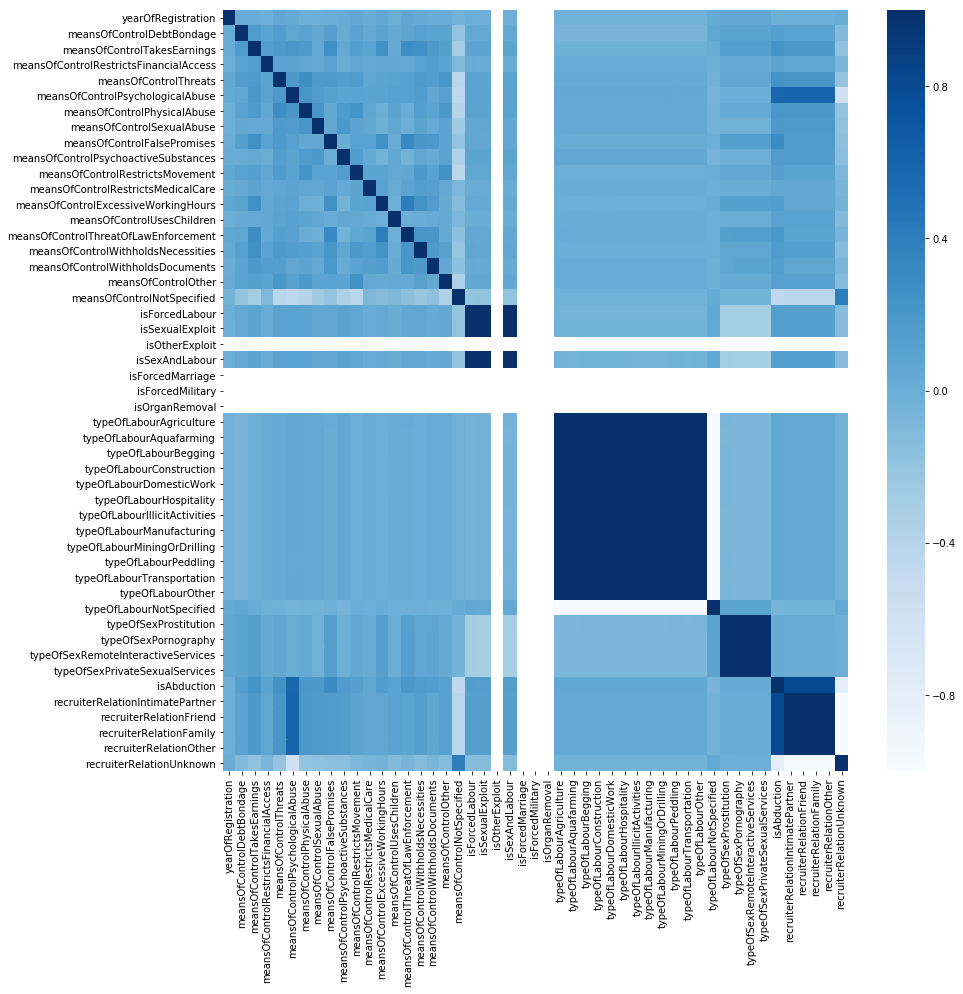

In [48]:
# calculate the correlation matrix
corr = X.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, ax=ax, xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = 'Blues')
plt.show()

In [20]:
corr_abs = corr.abs()

s = corr_abs.unstack()
corr_sort = s.sort_values(kind="quicksort", ascending = False)

print(corr_sort.head())

typeOfLabourIllicitActivities  typeOfLabourNotSpecified         1.0
typeOfLabourAquafarming        typeOfLabourNotSpecified         1.0
typeOfLabourTransportation     typeOfLabourNotSpecified         1.0
typeOfLabourNotSpecified       typeOfLabourAquafarming          1.0
                               typeOfLabourIllicitActivities    1.0
dtype: float64


In [21]:
corr_sort.shape

(2401,)

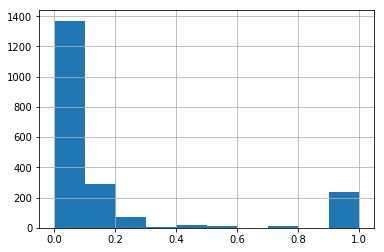

In [22]:
corr_sort.hist()

In [23]:
df_corr_sort = corr_sort.reset_index()

In [24]:
df_corr_sort.rename(columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'corr_val'}, inplace=True)

In [25]:
df_corr_sort.head()

,feature1,feature2,corr_val
0,typeOfLabourIllicitActivities,typeOfLabourNotSpecified,1.0
1,typeOfLabourAquafarming,typeOfLabourNotSpecified,1.0
2,typeOfLabourTransportation,typeOfLabourNotSpecified,1.0
3,typeOfLabourNotSpecified,typeOfLabourAquafarming,1.0
4,typeOfLabourNotSpecified,typeOfLabourIllicitActivities,1.0


In [26]:
df_corr_sort.shape

(2401, 3)

In [27]:
df_corr_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 3 columns):
feature1    2401 non-null object
feature2    2401 non-null object
corr_val    2025 non-null float64
dtypes: float64(1), object(2)
memory usage: 56.4+ KB


In [28]:
df_corr_sort_top = df_corr_sort[(df_corr_sort.corr_val < .97)  & (df_corr_sort.corr_val > 0.7)]

In [29]:
df_corr_sort_top.head(10)

,feature1,feature2,corr_val
239,isAbduction,recruiterRelationIntimatePartner,0.800046
240,recruiterRelationIntimatePartner,isAbduction,0.800046
241,recruiterRelationFamily,isAbduction,0.799841
242,isAbduction,recruiterRelationFamily,0.799841
243,recruiterRelationOther,isAbduction,0.799389
244,isAbduction,recruiterRelationOther,0.799389
245,isAbduction,recruiterRelationFriend,0.799295
246,recruiterRelationFriend,isAbduction,0.799295
247,isAbduction,recruiterRelationUnknown,0.794887
248,recruiterRelationUnknown,isAbduction,0.794887


In [30]:
df_corr_sort_top.shape

(10, 3)

In [31]:
df_corr_sort_too_high = df_corr_sort[(df_corr_sort.corr_val < 1.0)  & (df_corr_sort.corr_val > 0.97)]

In [32]:
df_corr_sort_too_high.shape

(164, 3)

In [33]:
df_corr_sort_too_high.head(10)

,feature1,feature2,corr_val
75,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,1.000000
76,typeOfSexPrivateSexualServices,typeOfSexRemoteInteractiveServices,1.000000
77,typeOfSexRemoteInteractiveServices,typeOfSexPornography,0.999998
78,typeOfSexPornography,typeOfSexRemoteInteractiveServices,0.999998
79,typeOfSexPrivateSexualServices,typeOfSexPornography,0.999998
80,typeOfSexPornography,typeOfSexPrivateSexualServices,0.999998
81,typeOfLabourNotSpecified,typeOfLabourConstruction,0.999997
82,typeOfLabourConstruction,typeOfLabourNotSpecified,0.999997
83,typeOfLabourConstruction,typeOfLabourAquafarming,0.999997
84,typeOfLabourAquafarming,typeOfLabourConstruction,0.999997


In [38]:
feature1_cols = list(df_corr_sort_top['feature1'])
feature2_cols = list(df_corr_sort_top['feature2'])
X_cols = list(X.columns)

In [39]:
cols_short_list = []
for item in X_cols:
    if (item in feature1_cols) or (item in feature2_cols):
        cols_short_list.append(item)

In [40]:
print(cols_short_list)

['isAbduction', 'recruiterRelationIntimatePartner', 'recruiterRelationFriend', 'recruiterRelationFamily', 'recruiterRelationOther', 'recruiterRelationUnknown']


In [41]:
X_short = X[[c for c in X.columns if c in cols_short_list]]

In [42]:
X_short.head()

,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
20889,0,1,0,0,0,0
20890,0,0,0,0,1,0
20891,0,1,0,0,0,0
20892,0,0,1,0,0,0
20893,0,0,0,1,0,0


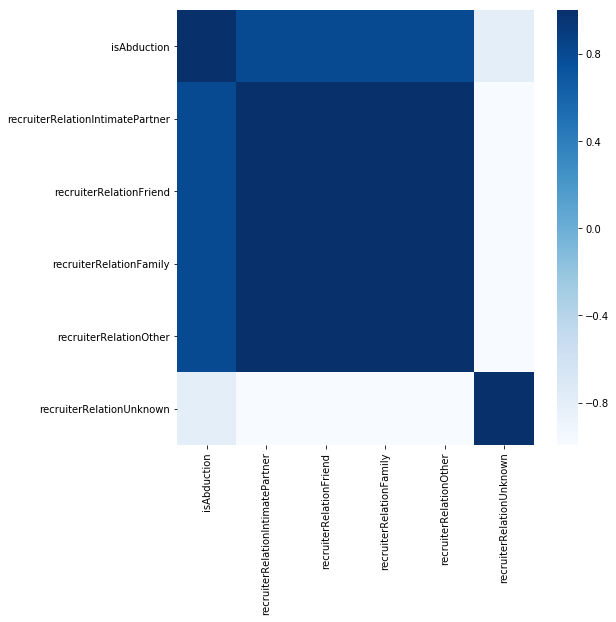

In [51]:
# calculate the correlation matrix
corr_short = X_short.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_short, ax=ax, xticklabels=corr_short.columns,
        yticklabels=corr_short.columns, cmap = 'Blues')
plt.show()

In [44]:
for i, col in enumerate(X_short.columns):
    print('VIF {}: {}'.format(col,variance_inflation_factor(X_short.values,i)))
    
## High VIF (5-10 or higher) indicates high correlation between column and one or more column(s)

VIF isAbduction: 10.07474936159935
VIF recruiterRelationIntimatePartner: 68481.01911216108
VIF recruiterRelationFriend: 160055.88831695227
VIF recruiterRelationFamily: 115184.83571051712
VIF recruiterRelationOther: 117519.99012383737
VIF recruiterRelationUnknown: 342.75465188461095
